In [27]:
from kaggle_environments import make
from copy import deepcopy
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Algoritmo MinMax

Testando o algoritmo MinMax para a profundidade máxima (9) contra um player reativo

In [28]:
vai_ganhar = lambda x, y: 1 if x == y else -1
inverte = lambda x: 1 if x==2 else 2

In [29]:
def isFinal(tabuleiro):
    # checa colunas
    for i in range(3):
        if tabuleiro[i] == tabuleiro[i + 3] == tabuleiro[i + 6] and tabuleiro[i] != 0:
            return True, tabuleiro[i]

    # checa linhas
    for i in range(0, 9, 3):
        if tabuleiro[i] == tabuleiro[i + 1] == tabuleiro[i + 2] and tabuleiro[i] != 0:
            return True, tabuleiro[i]

    # checa diagonais (as duas)
    if (tabuleiro[0] == tabuleiro[4] == tabuleiro[8] or tabuleiro[2] == tabuleiro[4] == tabuleiro[6]) and tabuleiro[
        4] != 0:
        return True, tabuleiro[4]

    return False, None

In [30]:
def quaseVitoria(tabuleiro, player):
    soma = 0
    # checa colunas não completas
    for i in range(3):
        if (tabuleiro[i] == tabuleiro[i + 3] and tabuleiro[i] != 0) or (
                tabuleiro[i + 6] == tabuleiro[i + 3] and tabuleiro[i + 6] != 0) or (
                tabuleiro[i] == tabuleiro[i + 6] and tabuleiro[i + 6] != 0):
            if tabuleiro[i] == 0:
                soma += vai_ganhar(tabuleiro[i + 3], player)
            if tabuleiro[i + 3] == 0:
                soma += vai_ganhar(tabuleiro[i], player)
            if tabuleiro[i + 6] == 0:
                soma += vai_ganhar(tabuleiro[i], player)

    # checa linhas não completas
    for i in range(0, 9, 3):
        if (tabuleiro[i] == tabuleiro[i + 1] and tabuleiro[i] != 0) or (
                tabuleiro[i + 2] == tabuleiro[i + 1] and tabuleiro[i + 2] != 0) or (
                tabuleiro[i] == tabuleiro[i + 2] and tabuleiro[i + 2] != 0):
            if tabuleiro[i] == 0:
                soma += vai_ganhar(tabuleiro[i + 1], player)
            if tabuleiro[i + 1] == 0:
                soma += vai_ganhar(tabuleiro[i], player)
            if tabuleiro[i + 2] == 0:
                soma += vai_ganhar(tabuleiro[i], player)

    # checa diagonal \ não completa
    if (tabuleiro[0] == tabuleiro[4] and tabuleiro[0] != 0) or (tabuleiro[0] == tabuleiro[8] and tabuleiro[0] != 0) or (
            tabuleiro[8] == tabuleiro[4] and tabuleiro[4] != 0):
        if tabuleiro[0] == 0:
            soma += vai_ganhar(tabuleiro[4], player)
        elif tabuleiro[4] == 0:
            soma += vai_ganhar(tabuleiro[0], player)
        elif tabuleiro[8] == 0:
            soma += vai_ganhar(tabuleiro[0], player)

    # checa diagonal / não completa
    if (tabuleiro[2] == tabuleiro[4] and tabuleiro[2] != 0) or (tabuleiro[2] == tabuleiro[6] and tabuleiro[2] != 0) or (
            tabuleiro[6] == tabuleiro[4] and tabuleiro[4] != 0):
        if tabuleiro[2] == 0:
            soma += vai_ganhar(tabuleiro[4], player)
        elif tabuleiro[4] == 0:
            soma += vai_ganhar(tabuleiro[2], player)
        elif tabuleiro[6] == 0:
            soma += vai_ganhar(tabuleiro[2], player)

    return soma

In [31]:
def f_utilidade(tabuleiro,player):
    final,i = isFinal(tabuleiro)
    soma=0
    if final:
        if i==player:
            soma+=100000
        else:
            soma+=-100000
    return quaseVitoria(tabuleiro,player)+soma

In [32]:
def sucessores(tabuleiro,player):
    success = list()
    for i in range(len(tabuleiro)):
        if tabuleiro[i]==0:
            est = deepcopy(tabuleiro)
            est[i] = player
            success.append((est,i))
    return success

In [33]:
def max_value(tabuleiro, p, player,acao):
    if p == 0 or isFinal(tabuleiro)[0]:
        return f_utilidade(tabuleiro,player), acao
    v = -math.inf
    for s,op in sucessores(tabuleiro, player):
        novo,_ = min_value(s, p-1,inverte(player),op)
        if novo>v:
            v = novo
            acao = op
    return v, acao


def min_value(tabuleiro, p, player, acao):
    if p == 0 or isFinal(tabuleiro)[0]:
        return f_utilidade(tabuleiro,inverte(player)), acao
    v = math.inf
    for s,op in sucessores(tabuleiro, player):
        novo,_ = max_value(s, p-1, inverte(player),op)
        if novo<v:
            v = novo
            acao = op
    return v, acao

In [34]:
def my_agent(obs,reward):
    p = 9
    player = obs['mark']
    v,acao = max_value(obs['board'],p,player,None)
    return acao

In [35]:
env = make('tictactoe', debug=False,
           configuration={"actTimeout": 1000,
                          "agentTimeout": 1000,
                          "runTimeout": 2000})
steps = env.run([my_agent, "reaction"])
env.render(mode='ipython', width=200, height=200)

## Testando o Algoritmo

### Profundidade Máxima

In [36]:
def check_winner(tabuleiro):
    # checa colunas
    for i in range(3):
        if tabuleiro[i] == tabuleiro[i + 3] == tabuleiro[i + 6] and tabuleiro[i] != 0:
            return tabuleiro[i]
    # checa linhas
    for i in range(0, 9, 3):
        if tabuleiro[i] == tabuleiro[i + 1] == tabuleiro[i + 2] and tabuleiro[i] != 0:
            return tabuleiro[i]
    # checa diagonais (as duas)
    if (tabuleiro[0] == tabuleiro[4] == tabuleiro[8] or tabuleiro[2] == tabuleiro[4] == tabuleiro[6]) and tabuleiro[
        4] != 0:
        return tabuleiro[4]
    return 0

In [37]:
def my_agent_profmax(obs,reward):
    p = 9
    player = obs['mark']
    v,acao = max_value(obs['board'],p,player,None)
    return acao

In [38]:
def reaction_test(iter, agent):
    runtime = list()
    winners = list()
    for i in range(iter):
        start_time = time.time()
        env = make('tictactoe', debug=False,
           configuration={"actTimeout": 1000,
                          "agentTimeout": 1000,
                          "runTimeout": 2000})
        steps = env.run([agent, "reaction"])
        end_time = time.time()
        runtime.append(end_time - start_time)
        winner = check_winner(steps[-1][0]['observation']['board'])
        winners.append(winner)
    return runtime, winners

def random_test(iter, agent):
    runtime = list()
    winners = list()
    for i in range(iter):
        start_time = time.time()
        env = make('tictactoe', debug=False,
           configuration={"actTimeout": 1000,
                          "agentTimeout": 1000,
                          "runTimeout": 2000})
        steps = env.run([agent, "random"])
        end_time = time.time()
        runtime.append(end_time - start_time)
        winner = check_winner(steps[-1][0]['observation']['board'])
        winners.append(winner)
    return runtime, winners

In [39]:
runtime_random, winners_random = random_test(200, my_agent_profmax)
runtime_reaction, winners_reaction = reaction_test(200, my_agent_profmax)

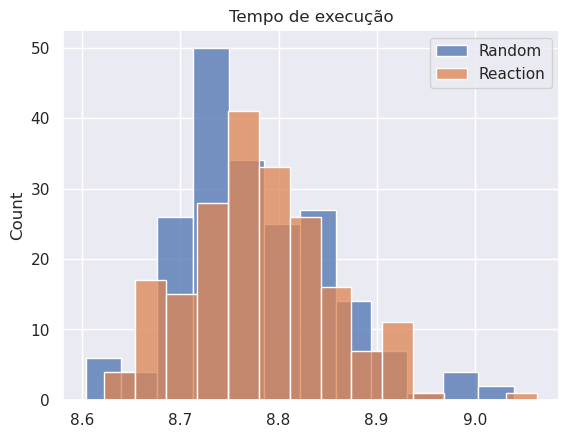

In [40]:
sns.set()
sns.histplot(runtime_random, label='Random')
sns.histplot(runtime_reaction, label='Reaction')
plt.title('Tempo de execução')
plt.legend()
plt.show()

In [41]:
# get average runtime
print('Runtime médio para cada agente: ')
print('Random: ', sum(runtime_random)/len(runtime_random))
print('Reaction: ', sum(runtime_reaction)/len(runtime_reaction))

Runtime médio para cada agente: 
Random:  8.776627901792526
Reaction:  8.779284777641296


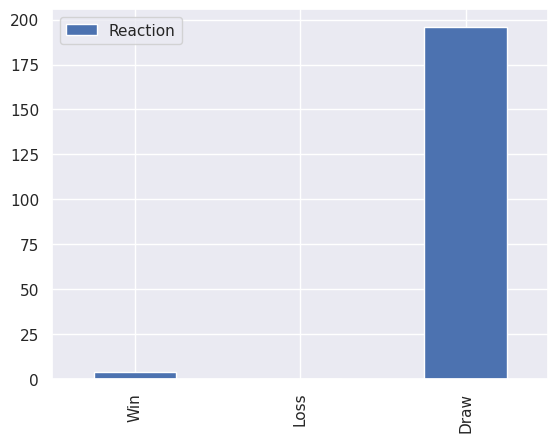

In [42]:
reaction_win = winners_reaction.count(1)
reaction_loss = winners_reaction.count(2)
reaction_draw = winners_reaction.count(0)

table = pd.DataFrame({'Reaction': [reaction_win, reaction_loss, reaction_draw]}, index=['Win', 'Loss', 'Draw'])
table.plot(kind='bar')
plt.show()

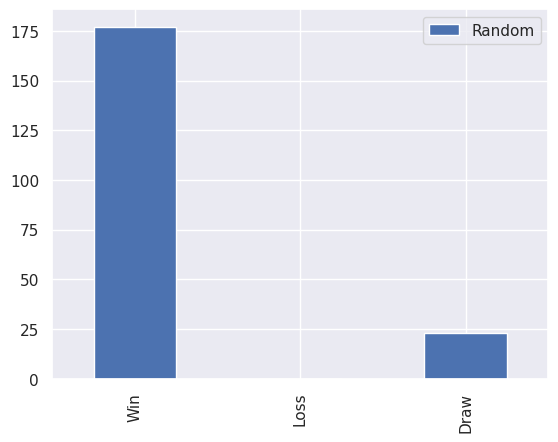

In [43]:
random_win = winners_random.count(1)
random_loss = winners_random.count(2)
random_draw = winners_random.count(0)

table = pd.DataFrame({'Random': [random_win, random_loss, random_draw]}, index=['Win', 'Loss', 'Draw'])
table.plot(kind='bar')
plt.show()

### Testando o Algoritmo com Profundidade 4

In [44]:
def my_agent_prof3(obs,reward):
    p = 3
    player = obs['mark']
    v,acao = max_value(obs['board'],p,player,None)
    return acao

In [45]:
runtime_random, winners_random = random_test(200, my_agent_prof3)
runtime_reaction, winners_reaction = reaction_test(200, my_agent_prof3)

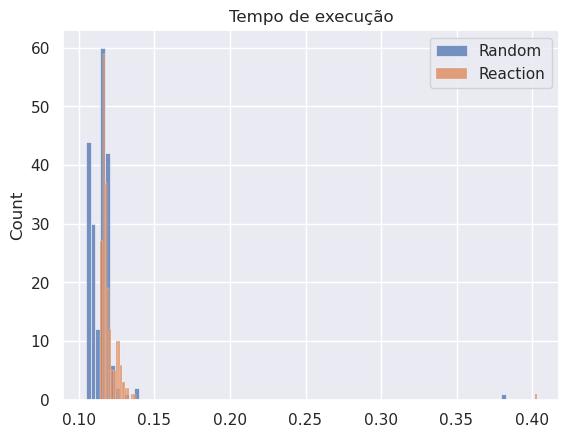

In [46]:
sns.set()
sns.histplot(runtime_random, label='Random')
sns.histplot(runtime_reaction, label='Reaction')
plt.title('Tempo de execução')
plt.legend()
plt.show()

In [47]:
# get average runtime
print('Runtime médio para cada agente: ')
print('Random: ', sum(runtime_random)/len(runtime_random))
print('Reaction: ', sum(runtime_reaction)/len(runtime_reaction))

Runtime médio para cada agente: 
Random:  0.11500784873962402
Reaction:  0.12072125911712646


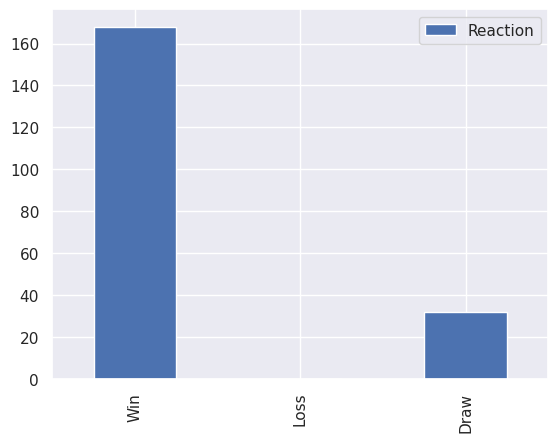

In [48]:
reaction_win = winners_reaction.count(1)
reaction_loss = winners_reaction.count(2)
reaction_draw = winners_reaction.count(0)

table = pd.DataFrame({'Reaction': [reaction_win, reaction_loss, reaction_draw]}, index=['Win', 'Loss', 'Draw'])
table.plot(kind='bar')
plt.show()

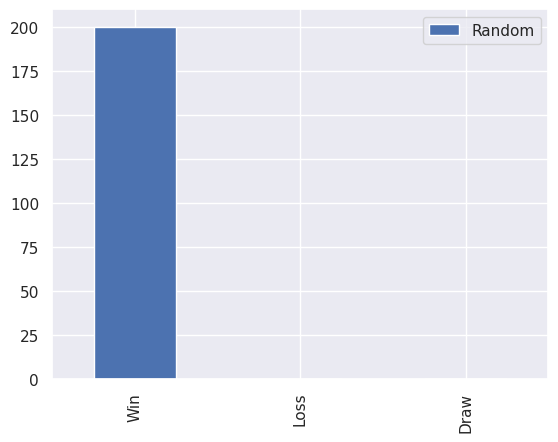

In [49]:
random_win = winners_random.count(1)
random_loss = winners_random.count(2)
random_draw = winners_random.count(0)

table = pd.DataFrame({'Random': [random_win, random_loss, random_draw]}, index=['Win', 'Loss', 'Draw'])
table.plot(kind='bar')
plt.show()